# Analyzing Startup Failures in the Healthcare Sector: A Data-Driven Approach

GitHub Project Repository Link: [https://github.com/ragini-sinha03/applied-ml-rsin/blob/master/lab04/ml04.ipynb]
Dataset Source: Healthcare.csv
Date: 23 March 2025


# Introduction

The Startup Failure (Healthcare.csv) dataset provides insights into the challenges faced by healthcare startups and the reasons behind their failures. The dataset includes key attributes such as the startup's sector, years of operation, funding raised, failure reasons, and major takeaways from their downfall.

Startups in the healthcare sector often operate in a complex ecosystem involving regulatory constraints, high capital requirements, and technological advancements. This dataset allows us to analyze common failure patterns and identify critical factors affecting startup longevity.

This project will involve:

Decision Tree Classifier (DT)
A Decision Tree splits data into smaller groups based on decision rules (such as "Did the startup run out of funding?"). It works like a flowchart, where each decision point leads to another question until a final classification is reached.

Strengths: Easy to interpret and fast to train.
Weaknesses: Can overfit if the tree becomes too complex.

Random Forest (RF)
A Random Forest builds multiple decision trees and combines their outputs for better prediction accuracy. This technique helps reduce overfitting and provides more stable predictions.

Strengths: Handles missing data well and reduces overfitting.
Weaknesses: Computationally expensive and harder to interpret than a single decision tree.

Support Vector Machine (SVM)
A Support Vector Machine (SVM) finds the best boundary (a hyperplane) to separate successful and failed startups. It is effective in handling non-linear relationships by using different kernel functions.

Strengths: Works well with complex data and high-dimensional features.
Weaknesses: Computationally expensive for large datasets.

Linear Regression (LR)
Linear Regression is a fundamental statistical method used to predict a continuous dependent variable (such as "Years of Operation") based on independent variables like funding amount, sector, and market conditions. It finds the best-fitting line that minimizes prediction errors.

Strengths: Simple to implement and easy to interpret.
Weaknesses: Assumes a linear relationship between variables, which may not always hold.

# 1. Load Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load the data set

In [ ]:
df = pd.read_csv("C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv")  
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    60 non-null     object
 1   Sector                  60 non-null     object
 2   Years of Operation      60 non-null     object
 3   What They Did           60 non-null     object
 4   How Much They Raised    60 non-null     object
 5   Why They Failed         60 non-null     object
 6   Takeaway                60 non-null     object
 7   Giants                  60 non-null     int64 
 8   No Budget               60 non-null     int64 
 9   Competition             60 non-null     int64 
 10  Poor Market Fit         60 non-null     int64 
 11  Acquisition Stagnation  60 non-null     int64 
 12  Platform Dependency     60 non-null     int64 
 13  Monetization Failure    60 non-null     int64 
 14  Niche Limits            60 non-null     int64 
 15  Executio

# 3. Splitting of data set

In [9]:


# Handle potential numeric conversion issues in 'How Much They Raised'
def clean_funding(funding_str):
    if isinstance(funding_str, str):
        funding_str = funding_str.replace('~', '').replace('$', '').replace('B', '000000000').replace('M', '000000')
        try:
            return float(funding_str)
        except ValueError:
            return None  # Or some other appropriate handling for invalid entries
    return funding_str

df['How Much They Raised'] = df['How Much They Raised'].apply(clean_funding)

# Handle missing values (you might need more sophisticated handling)
df = df.dropna()

# One-hot encode the categorical features
categorical_features = ['What They Did', 'Why They Failed'] #Add more if needed
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Create Start Year and End Year columns
df['Start Year'] = df['Years of Operation'].str.split('-').str[0].astype(int)
df['End Year'] = df['Years of Operation'].str.split('-').str[1]
df['End Year'] = df['End Year'].fillna(df['Start Year'])
df['End Year'] = df['End Year'].astype(int)

# Combine encoded features with numerical features, and start/end years.
numerical_features = ['Years of Operation', 'How Much They Raised', 'Start Year', 'End Year']
final_df = pd.concat([df[numerical_features].reset_index(drop=True), encoded_df], axis=1)

# Create training and testing sets.
X = final_df
y = df['Why They Failed'] # or another target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature combinations
feature_combinations = [
    ['Years of Operation'],
    ['How Much They Raised'],
    ['What They Did'],
    ['Why They Failed'],
    ['Years of Operation', 'How Much They Raised'],
    ['Years of Operation', 'What They Did'],
    ['Years of Operation', 'Why They Failed'],
    ['How Much They Raised', 'What They Did'],
    ['How Much They Raised', 'Why They Failed'],
    ['What They Did', 'Why They Failed'],
    ['Years of Operation', 'How Much They Raised', 'What They Did'],
    ['Years of Operation', 'How Much They Raised', 'Why They Failed'],
    ['Years of Operation', 'What They Did', 'Why They Failed'],
    ['How Much They Raised', 'What They Did', 'Why They Failed'],
    ['Years of Operation', 'How Much They Raised', 'What They Did', 'Why They Failed'],
    ['Start Year'],
    ['End Year'],
    ['Start Year', 'End Year']
]

# Generate and print feature subsets
for feature_set in feature_combinations:
    selected_features = []
    for feature in feature_set:
        if feature in numerical_features:
            selected_features.append(feature)
        elif feature in categorical_features:
            selected_features.extend([col for col in encoded_feature_names if col.startswith(f'{feature}_')])

    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    print(f"Feature Set: {'_'.join(feature_set)}")
    print(f"X_train Shape: {X_train_subset.shape}, X_test Shape: {X_test_subset.shape}")
    print("=" * 50)

# Add Output to file.
output_filename = "data_splitting_output.txt" # define the output file name.
with open(output_filename, "w") as f:
    for feature_set in feature_combinations:
        selected_features = []
        for feature in feature_set:
            if feature in numerical_features:
                selected_features.append(feature)
            elif feature in categorical_features:
                selected_features.extend([col for col in encoded_feature_names if col.startswith(f'{feature}_')])

        X_train_subset = X_train[selected_features]
        X_test_subset = X_test[selected_features]

        output_line = f"Feature Set: {'_'.join(feature_set)}\n"
        output_line += f"X_train Shape: {X_train_subset.shape}, X_test Shape: {X_test_subset.shape}\n"
        output_line += "=" * 50 + "\n"

        f.write(output_line)

print(f"Output written to {output_filename}") # confirmation message.





Feature Set: Years of Operation
X_train Shape: (47, 1), X_test Shape: (12, 1)
Feature Set: How Much They Raised
X_train Shape: (47, 1), X_test Shape: (12, 1)
Feature Set: What They Did
X_train Shape: (47, 58), X_test Shape: (12, 58)
Feature Set: Why They Failed
X_train Shape: (47, 59), X_test Shape: (12, 59)
Feature Set: Years of Operation_How Much They Raised
X_train Shape: (47, 2), X_test Shape: (12, 2)
Feature Set: Years of Operation_What They Did
X_train Shape: (47, 59), X_test Shape: (12, 59)
Feature Set: Years of Operation_Why They Failed
X_train Shape: (47, 60), X_test Shape: (12, 60)
Feature Set: How Much They Raised_What They Did
X_train Shape: (47, 59), X_test Shape: (12, 59)
Feature Set: How Much They Raised_Why They Failed
X_train Shape: (47, 60), X_test Shape: (12, 60)
Feature Set: What They Did_Why They Failed
X_train Shape: (47, 117), X_test Shape: (12, 117)
Feature Set: Years of Operation_How Much They Raised_What They Did
X_train Shape: (47, 60), X_test Shape: (12, 60)

# 4. Handle Missing Values

In [16]:


def clean_and_handle_missing_data(file_path, output_file="data_processing_output.txt"):
    """
    Reads a CSV file, cleans 'How Much They Raised', creates 'Start Year' and 
    'End Year', and handles missing values. Writes output to a file.

    Args:
        file_path (str): The path to the CSV file.
        output_file (str): The name of the file to write output to.
    """

    # Save the original stdout
    original_stdout = sys.stdout

    # Redirect stdout to the output file
    with open(output_file, "w") as f:
        sys.stdout = f

        # 1. Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # 2. Display basic information about the DataFrame
        print("Initial DataFrame Info:")
        df.info()
        print("\nInitial DataFrame Head:")
        print(df.head())

        # 3. Clean the 'How Much They Raised' column
        def clean_funding(funding_str):
            if isinstance(funding_str, str):
                funding_str = funding_str.replace('~', '').replace('$', '').replace('B', '000000000').replace('M', '000000')
                try:
                    return float(funding_str)
                except ValueError:
                    return None
            return funding_str

        df['How Much They Raised'] = df['How Much They Raised'].apply(clean_funding)

        # 4. Create 'Start Year' and 'End Year' columns
        df['Start Year'] = df['Years of Operation'].str.split('-').str[0].astype(int)
        df['End Year'] = df['Years of Operation'].str.split('-').str[1]
        df['End Year'] = df['End Year'].fillna(df['Start Year'])
        df['End Year'] = df['End Year'].astype(int)

        # 5. Handle missing values
        # Separate numerical and categorical columns
        numerical_cols = df.select_dtypes(include=['number']).columns
        categorical_cols = df.select_dtypes(include=['object']).columns

        # Fill missing numerical values with the mean
        if numerical_cols.any():
            numerical_imputer = SimpleImputer(strategy='mean')
            df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

        # Fill missing categorical values with the most frequent value
        if categorical_cols.any():
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

        # 6. Display information after handling missing values.
        print("\nDataFrame Info After Handling Missing Values:")
        df.info()
        print("\nDataFrame Head After Handling Missing Values:")
        print(df.head())
        print("\nNull Values per Column after handling missing values:")
        print(df.isnull().sum())

    # Restore the original stdout
    sys.stdout = original_stdout

    return df

# Example usage:
file_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv"
cleaned_data = clean_and_handle_missing_data(file_path)

# 5. Data Processing 

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
import sys  # Import the sys module for stdout redirection

def clean_and_handle_missing_data(file_path, output_file="data_processing_output.txt"):
    """
    Reads a CSV file, cleans 'How Much They Raised', creates 'Start Year' and 
    'End Year', and handles missing values. Writes output to a file.

    Args:
        file_path (str): The path to the CSV file.
        output_file (str): The name of the file to write output to.
    """

    # Save the original stdout
    original_stdout = sys.stdout

    # Redirect stdout to the output file
    with open(output_file, "w") as f:
        sys.stdout = f

        # 1. Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # 2. Display basic information about the DataFrame
        print("Initial DataFrame Info:")
        df.info()
        print("\nInitial DataFrame Head:")
        print(df.head())

        # 3. Clean the 'How Much They Raised' column
        def clean_funding(funding_str):
            if isinstance(funding_str, str):
                funding_str = funding_str.replace('~', '').replace('$', '').replace('B', '000000000').replace('M', '000000')
                try:
                    return float(funding_str)
                except ValueError:
                    return None
            return funding_str

        df['How Much They Raised'] = df['How Much They Raised'].apply(clean_funding)

        # 4. Create 'Start Year' and 'End Year' columns
        df['Start Year'] = df['Years of Operation'].str.split('-').str[0].astype(int)
        df['End Year'] = df['Years of Operation'].str.split('-').str[1]
        df['End Year'] = df['End Year'].fillna(df['Start Year'])
        df['End Year'] = df['End Year'].astype(int)

        # 5. Handle missing values
        # Separate numerical and categorical columns
        numerical_cols = df.select_dtypes(include=['number']).columns
        categorical_cols = df.select_dtypes(include=['object']).columns

        # Fill missing numerical values with the mean
        if numerical_cols.any():
            numerical_imputer = SimpleImputer(strategy='mean')
            df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

        # Fill missing categorical values with the most frequent value
        if categorical_cols.any():
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

        # 6. Display information after handling missing values.
        print("\nDataFrame Info After Handling Missing Values:")
        df.info()
        print("\nDataFrame Head After Handling Missing Values:")
        print(df.head())
        print("\nNull Values per Column after handling missing values:")
        print(df.isnull().sum())

    # Restore the original stdout
    sys.stdout = original_stdout

    return df

# Example usage:
file_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv"
cleaned_data = clean_and_handle_missing_data(file_path)

# 6. Encoding Categorical features

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import sys

def encode_categorical_features(df, categorical_cols, output_file="encoding_output.txt"):
    """
    Encodes categorical features in a DataFrame using one-hot encoding and writes the output to a file.

    Args:
        df (pd.DataFrame): The input DataFrame.
        categorical_cols (list): A list of categorical column names.
        output_file (str): The name of the file to write output to.

    Returns:
        pd.DataFrame: The DataFrame with encoded categorical features.
    """

    original_stdout = sys.stdout

    with open(output_file, "w") as f:
        sys.stdout = f

        if not categorical_cols:
            print("No categorical columns to encode.")
            return df

        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(df[categorical_cols])
        encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
        encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

        df = df.drop(categorical_cols, axis=1)
        df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

        print("DataFrame Info After Encoding Categorical Features:")
        df.info()
        print("\nDataFrame Head After Encoding Categorical Features:")
        print(df.head())

    sys.stdout = original_stdout

    return df

# 7. Scaling Numerical Features

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset from your specified path
file_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv"
df = pd.read_csv(file_path)

# Selecting numerical columns for scaling
numerical_features = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation",
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws",
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype"
]

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

# Min-Max Normalization (Scaling between 0 and 1)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

# Save the transformed datasets
standardized_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/healthcare_standardized.csv"
normalized_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/healthcare_normalized.csv"

df_standardized.to_csv(standardized_path, index=False)
df_normalized.to_csv(normalized_path, index=False)

# Display confirmation
print(f"Standardized dataset saved at: {standardized_path}")
print(f"Normalized dataset saved at: {normalized_path}")


Standardized dataset saved at: C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/healthcare_standardized.csv
Normalized dataset saved at: C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/healthcare_normalized.csv


 # Debugging the code

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset from your specified path
file_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv"

print("Loading dataset...")
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Selecting numerical columns for scaling
numerical_features = [
    "Giants", "No Budget", "Competition", "Poor Market Fit", "Acquisition Stagnation",
    "Platform Dependency", "Monetization Failure", "Niche Limits", "Execution Flaws",
    "Trend Shifts", "Toxicity/Trust Issues", "Regulatory Pressure", "Overhype"
]

# Standardization (Z-score normalization)
print("Applying StandardScaler...")
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler_standard.fit_transform(df[numerical_features])
print("StandardScaler applied.")

# Min-Max Normalization (Scaling between 0 and 1)
print("Applying MinMaxScaler...")
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])
print("MinMaxScaler applied.")

# Save the transformed datasets
standardized_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/healthcare_standardized.csv"
normalized_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/healthcare_normalized.csv"

print("Saving files...")
df_standardized.to_csv(standardized_path, index=False)
df_normalized.to_csv(normalized_path, index=False)
print("Files saved successfully.")

print("Script completed.")


Loading dataset...
Dataset loaded successfully.
Applying StandardScaler...
StandardScaler applied.
Applying MinMaxScaler...
MinMaxScaler applied.
Saving files...
Files saved successfully.
Script completed.


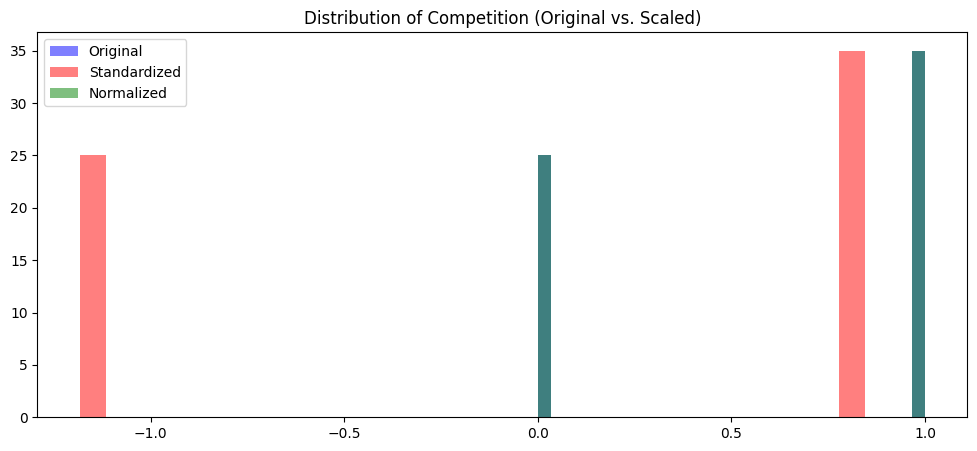

In [3]:
import matplotlib.pyplot as plt

# Plot histogram for original vs. standardized vs. normalized data
feature = "Competition"  # Choose a feature to visualize

plt.figure(figsize=(12, 5))
plt.hist(df[feature], bins=30, alpha=0.5, label="Original", color='blue')
plt.hist(df_standardized[feature], bins=30, alpha=0.5, label="Standardized", color='red')
plt.hist(df_normalized[feature], bins=30, alpha=0.5, label="Normalized", color='green')
plt.legend()
plt.title(f"Distribution of {feature} (Original vs. Scaled)")
plt.show()


# 8. Data Visualization 

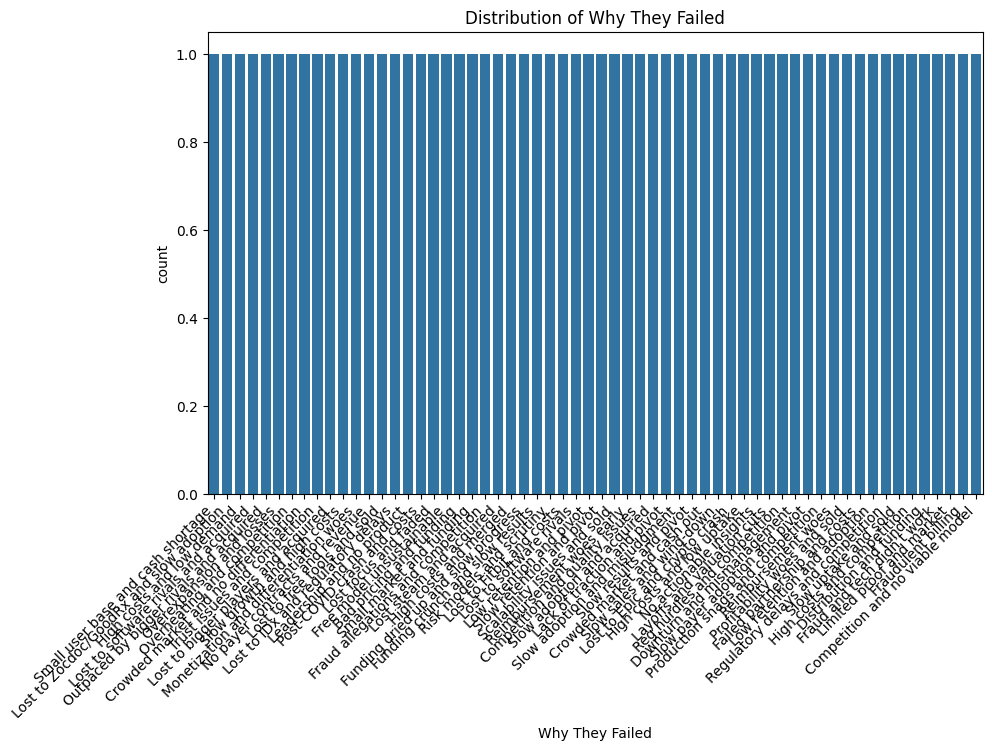

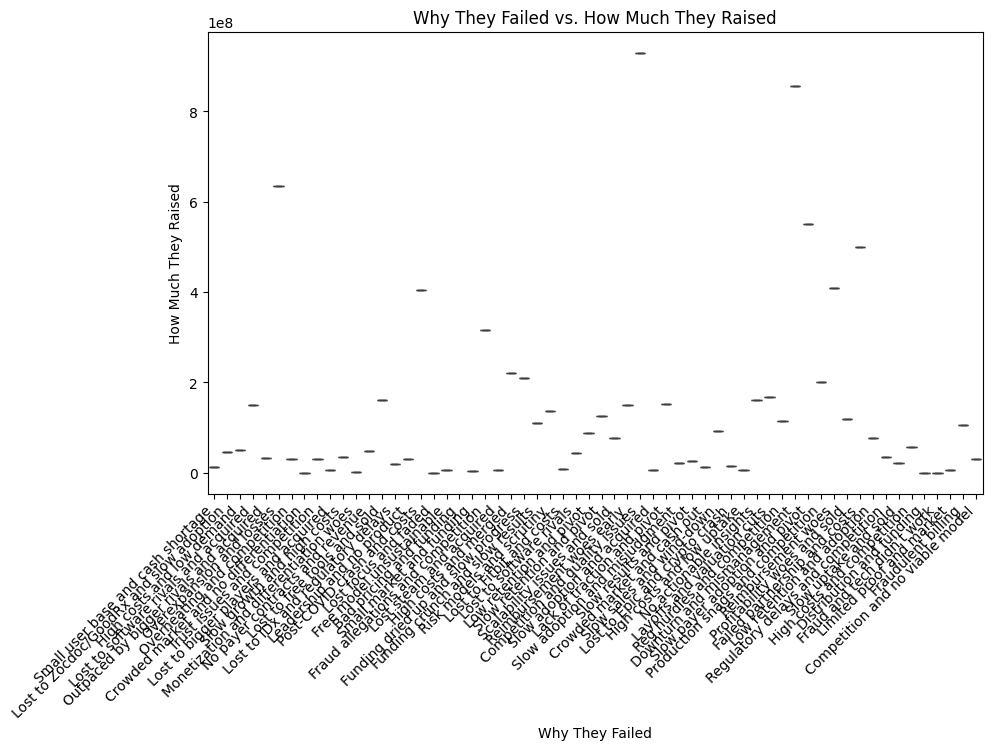

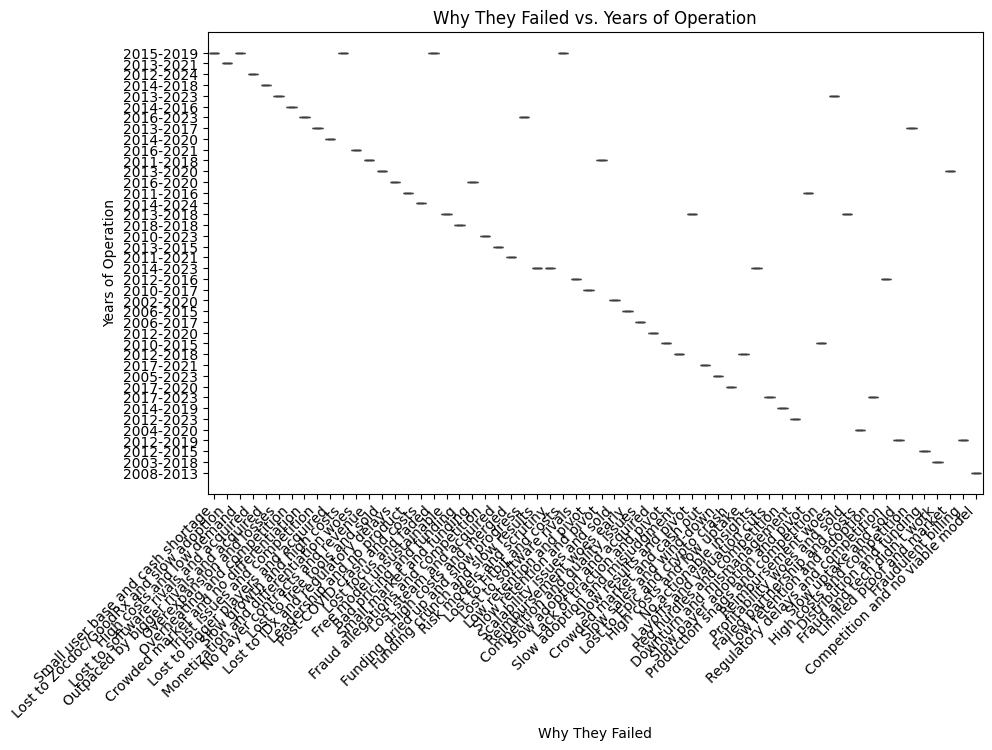

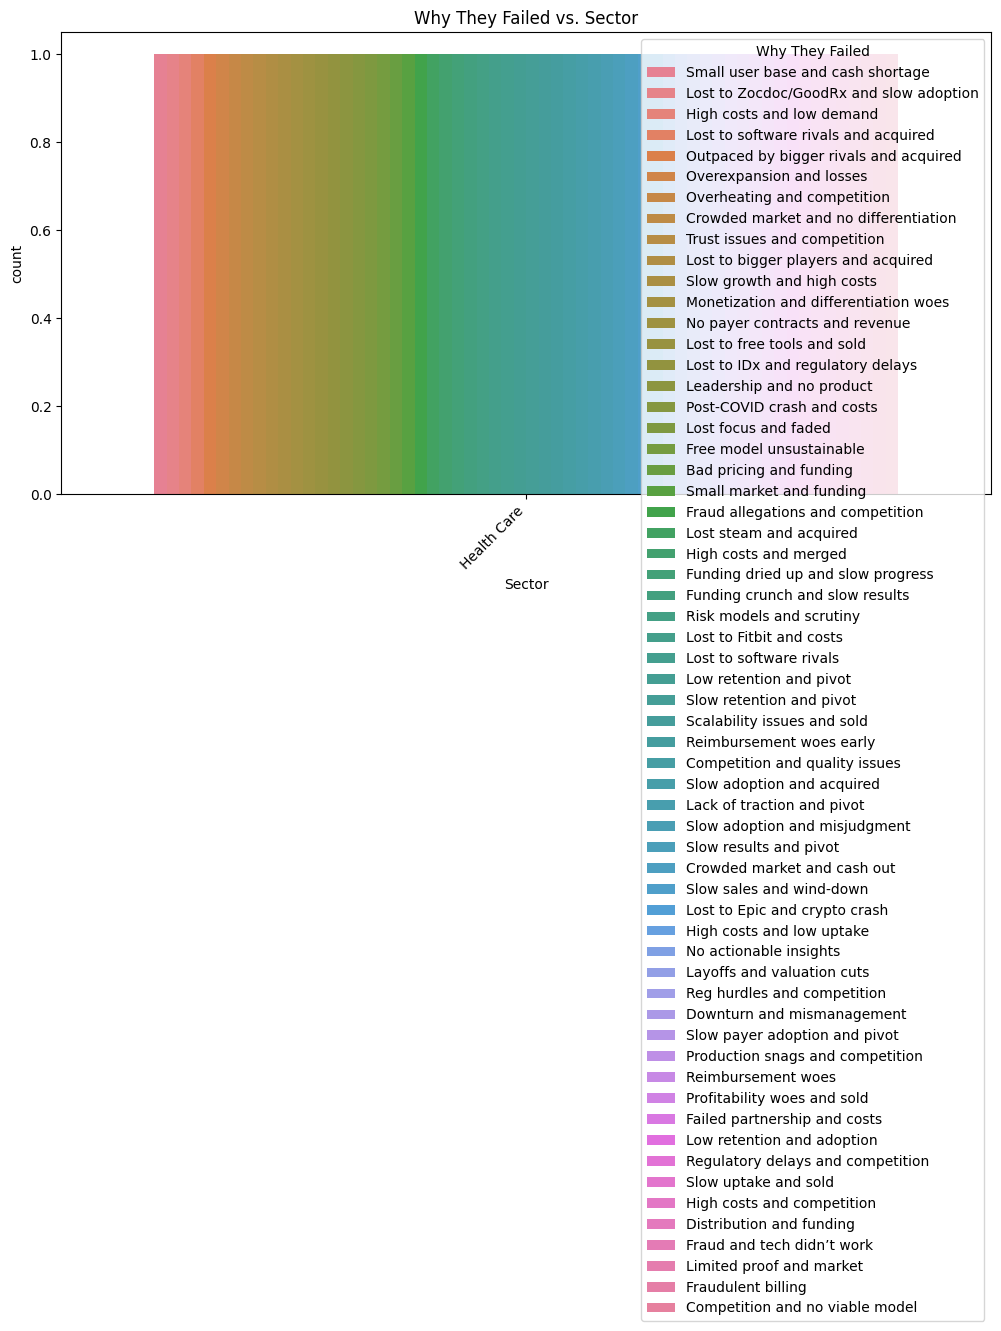

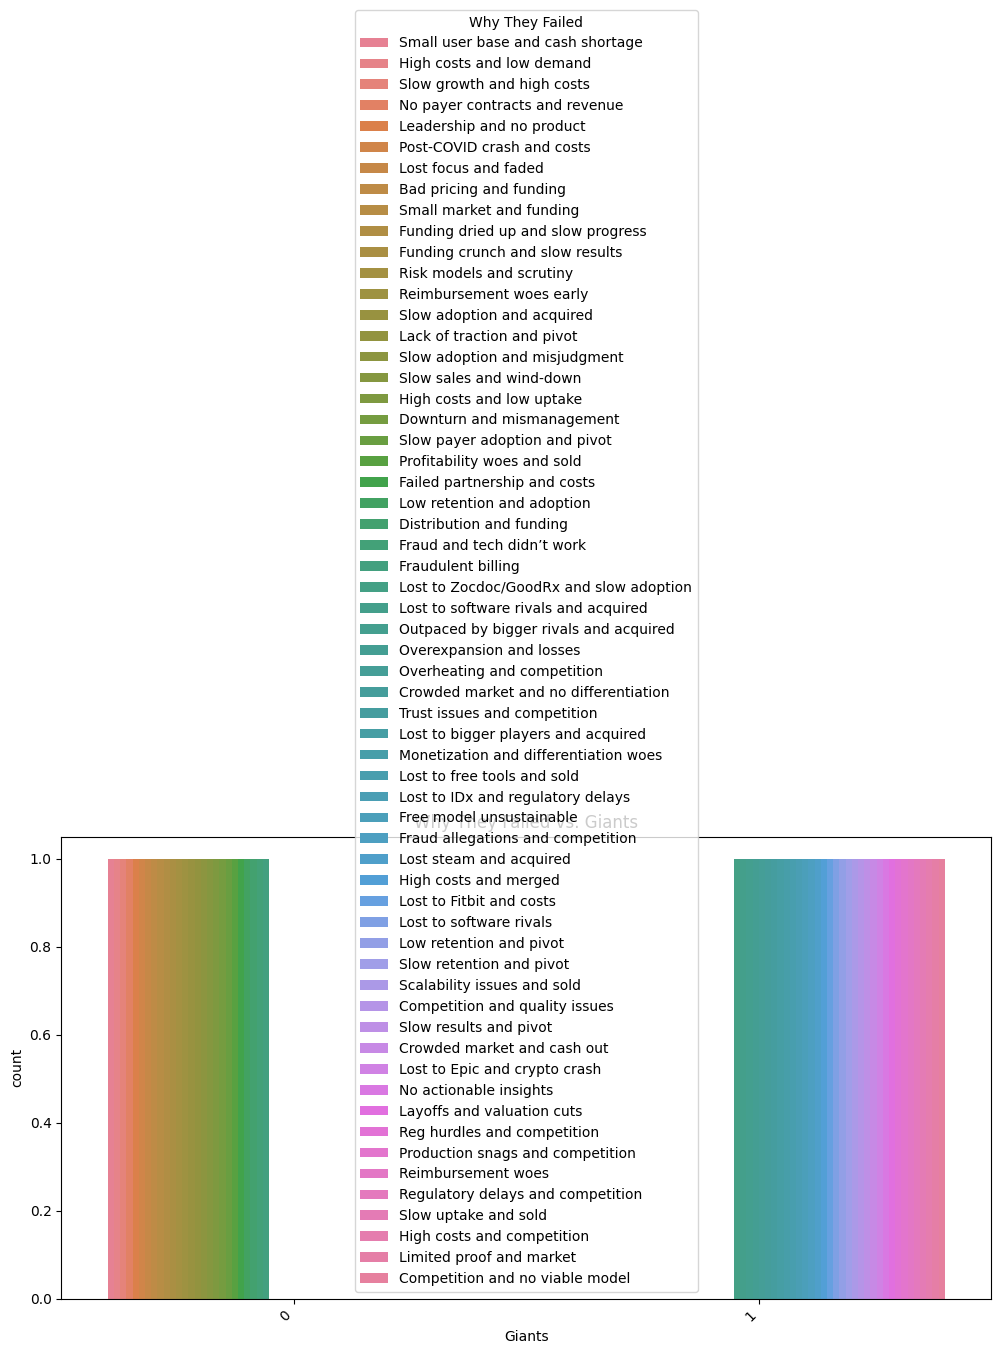

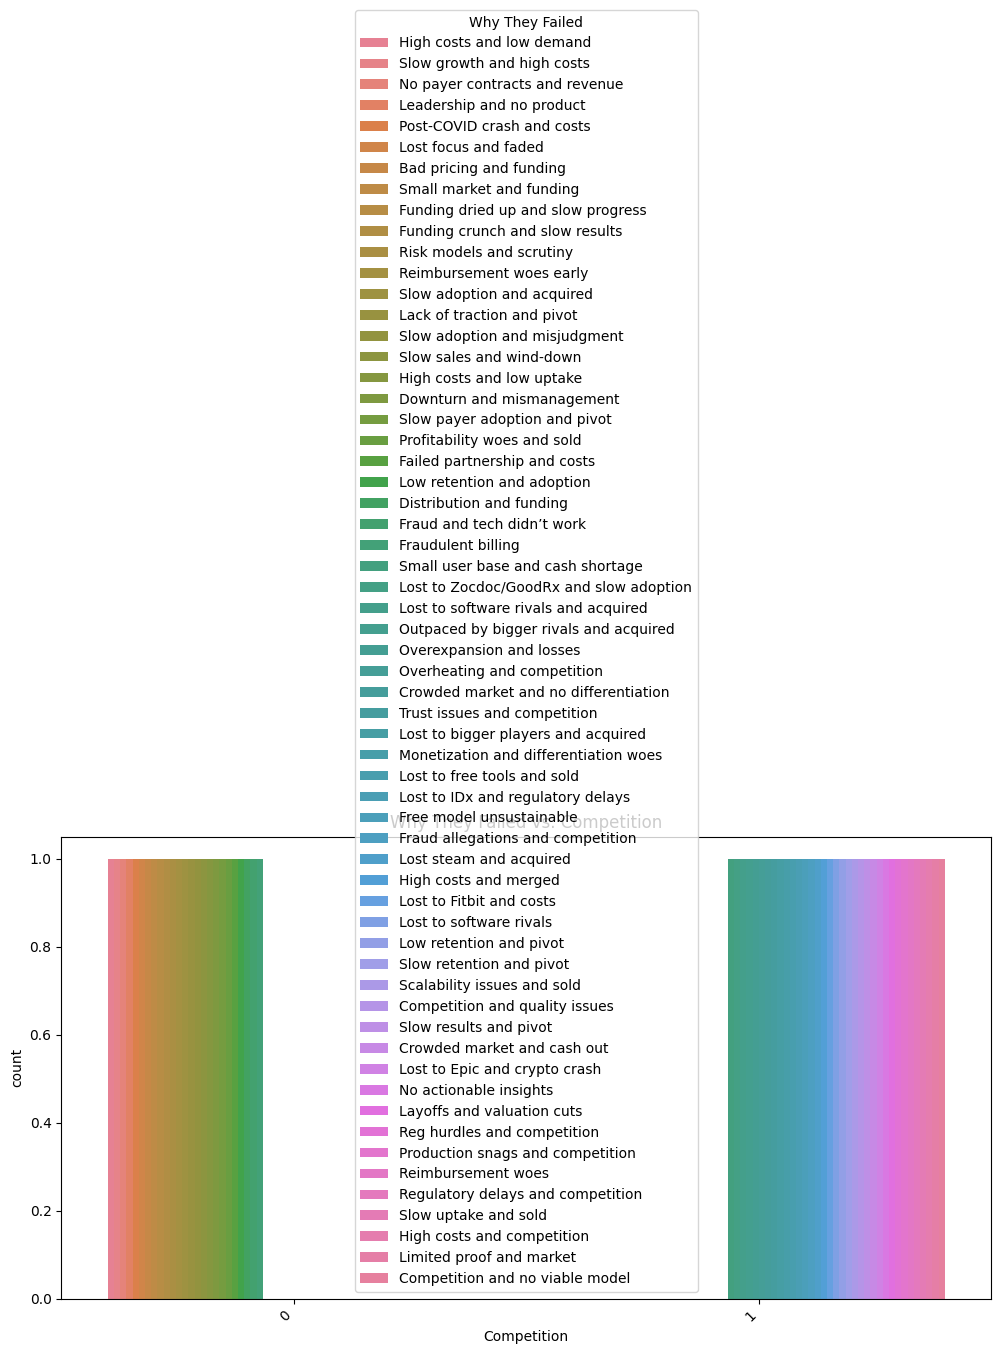

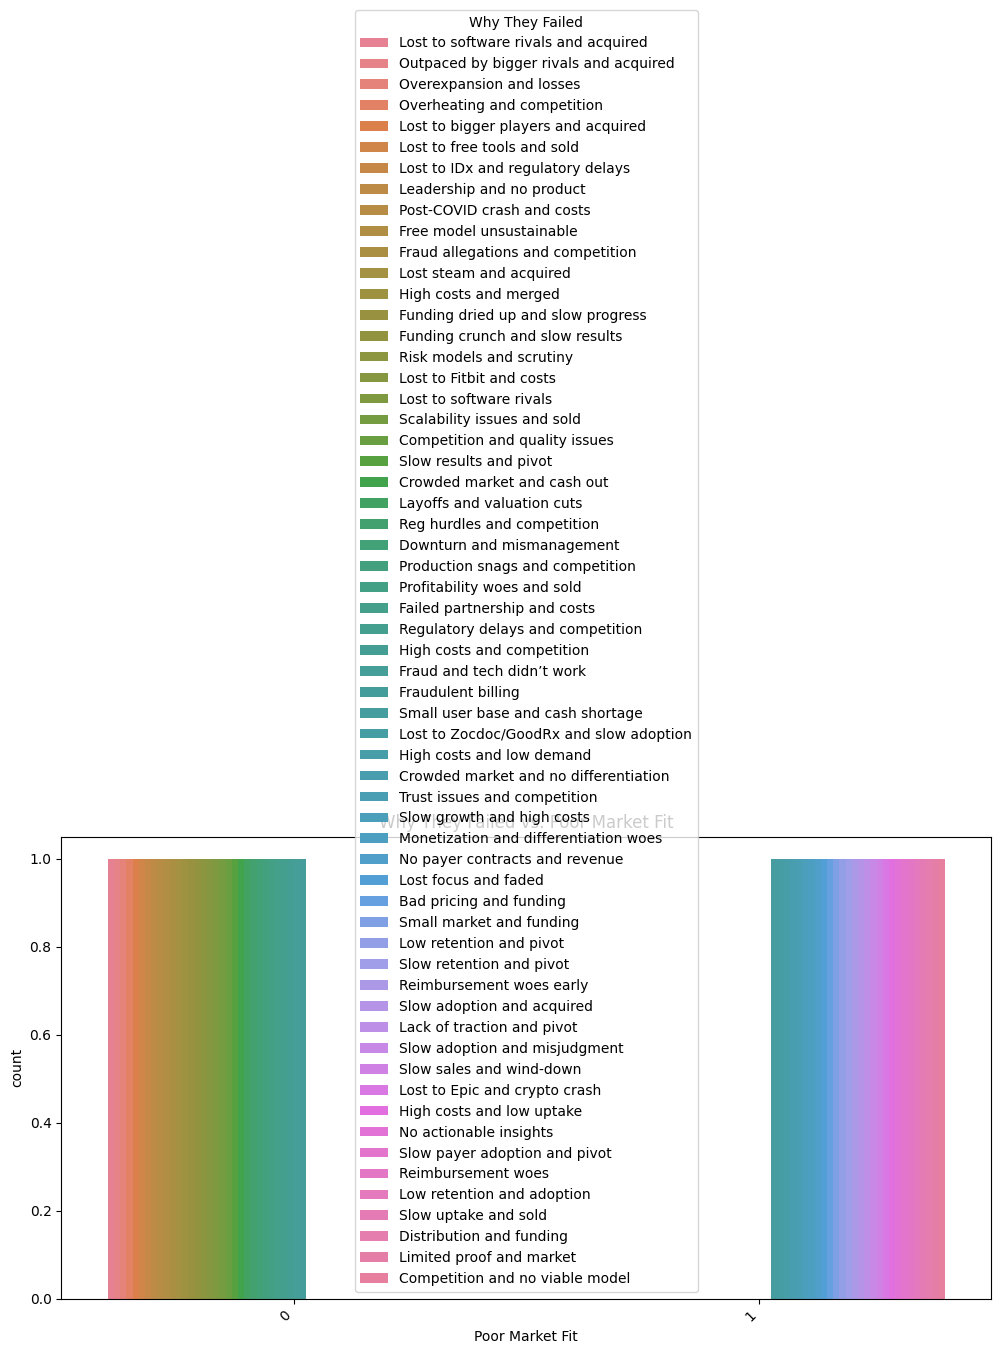

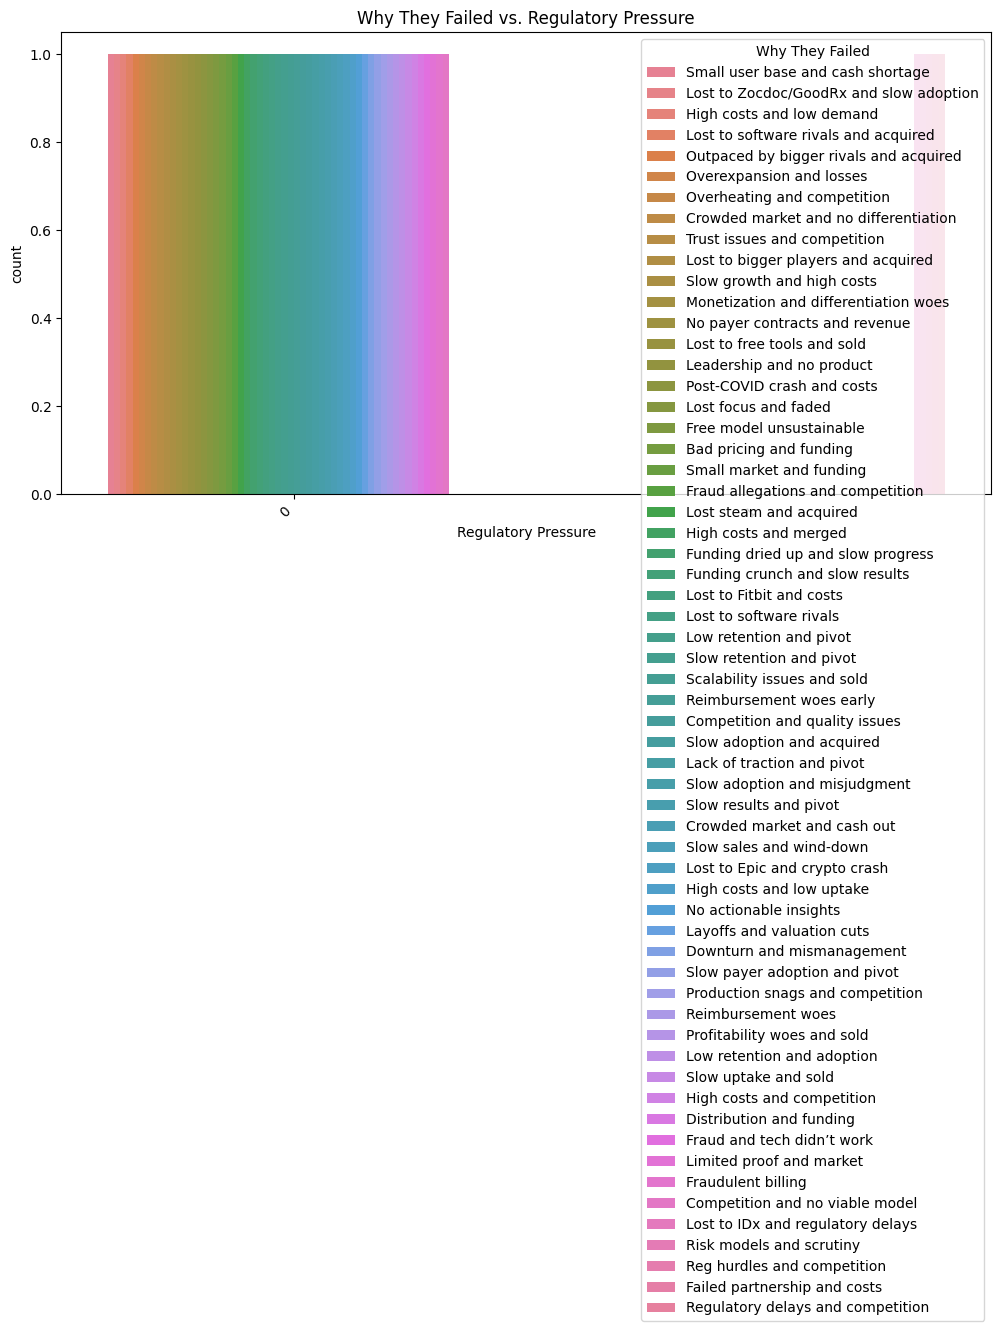

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

def visualize_relevant_relationships(df, output_file="relevant_relationships.txt"):
    """
    Visualizes relevant relationships in the Healthcare dataset and writes output to a file.
    """

    original_stdout = sys.stdout

    with open(output_file, "w") as f:
        sys.stdout = f

        # Key Columns for Analysis (Adjust based on your priorities)
        target_col = 'Why They Failed'
        numerical_cols = ['How Much They Raised', 'Years of Operation'] # Add/remove relevant numerical columns.
        categorical_cols = ['Sector', 'Giants', 'Competition', 'Poor Market Fit', 'Regulatory Pressure'] #Add/remove relevant categories.

        # 1. Target Variable Distribution
        if target_col in df.columns:
            print(f"Distribution of {target_col}")
            plt.figure(figsize=(10, 6))
            sns.countplot(x=target_col, data=df)
            plt.title(f'Distribution of {target_col}')
            plt.xticks(rotation=45, ha='right')
            plt.show()

        # 2. Target vs. Numerical
        for num_col in numerical_cols:
            if num_col in df.columns and target_col in df.columns:
                print(f"{target_col} vs. {num_col}")
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=target_col, y=num_col, data=df)
                plt.title(f'{target_col} vs. {num_col}')
                plt.xticks(rotation=45, ha='right')
                plt.show()

        # 3. Target vs. Categorical
        for cat_col in categorical_cols:
            if cat_col in df.columns and target_col in df.columns:
                print(f"{target_col} vs. {cat_col}")
                plt.figure(figsize=(12, 6))
                sns.countplot(x=cat_col, hue=target_col, data=df)
                plt.title(f'{target_col} vs. {cat_col}')
                plt.xticks(rotation=45, ha='right')
                plt.show()

        # 4. Numerical vs. Numerical (Correlation & Scatter)
        if len(numerical_cols) > 1:
            print("Correlation Matrix of Numerical Features")
            plt.figure(figsize=(8, 6))
            sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
            plt.title('Correlation Matrix of Numerical Features')
            plt.show()

            if 'How Much They Raised' in numerical_cols and 'Years of Operation' in numerical_cols:
                print("How Much They Raised vs. Years of Operation")
                plt.figure(figsize=(8, 6))
                sns.scatterplot(x='Years of Operation', y='How Much They Raised', data=df)
                plt.title('How Much They Raised vs. Years of Operation')
                plt.show()

        # 5. Categorical vs. Categorical (Example)
        if 'Sector' in categorical_cols and 'Giants' in categorical_cols:
            print("Sector vs. Giants")
            plt.figure(figsize=(10, 6))
            sns.countplot(x='Sector', hue='Giants', data=df)
            plt.title('Sector vs. Giants')
            plt.xticks(rotation=45, ha='right')
            plt.show()

    sys.stdout = original_stdout

# Load your Healthcare dataset
file_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv"
df = pd.read_csv(file_path)

# Clean the 'How Much They Raised' column
def clean_funding(funding_str):
    if isinstance(funding_str, str):
        funding_str = funding_str.replace('~', '').replace('$', '').replace('B', '000000000').replace('M', '000000')
        try:
            return float(funding_str)
        except ValueError:
            return None
    return funding_str

df['How Much They Raised'] = df['How Much They Raised'].apply(clean_funding)

# Create 'Start Year' and 'End Year' columns
df['Start Year'] = df['Years of Operation'].str.split('-').str[0].astype(int)
df['End Year'] = df['Years of Operation'].str.split('-').str[1]
df['End Year'] = df['End Year'].fillna(df['Start Year'])
df['End Year'] = df['End Year'].astype(int)

# Call the visualization function
visualize_relevant_relationships(df.copy())

# 9. Feature Selection for Model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

def feature_selection_and_visualization(df, output_file="feature_selection_output.txt"):
    """
    Performs feature selection and visualization on the Healthcare dataset.
    """

    original_stdout = sys.stdout

    with open(output_file, "w") as f:
        sys.stdout = f

        # Check if the column exists before encoding
        print(f"Columns before encoding: {df.columns}")

        # Encode categorical features
        try:
            df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)
        except Exception as e:
            print(f"Error during encoding: {e}")
            return

        # Check if the column exists after encoding
        print(f"Columns after encoding: {df.columns}")

        # Split data into features (X) and target (y)
        if 'Why They Failed' in df.columns:
            X = df.drop('Why They Failed', axis=1)
            y = df['Why They Failed']

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # 1. Correlation-Based Feature Selection (Numerical)
            numerical_cols = X_train.select_dtypes(include=['number']).columns
            corr_matrix = X_train[numerical_cols].corr().abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
            X_train_corr = X_train.drop(to_drop_corr, axis=1)
            X_test_corr = X_test.drop(to_drop_corr, axis=1)

            print("Columns dropped due to high correlation:", to_drop_corr)

            # 2. Feature Importance from Random Forest
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train_corr, y_train)
            feature_importances = pd.Series(rf.feature_importances_, index=X_train_corr.columns)

            print("Random Forest Feature Importance:")
            print(feature_importances.nlargest(10))

            plt.figure(figsize=(10, 6))
            feature_importances.nlargest(10).plot(kind='barh')
            plt.title("Random Forest Feature Importance")
            plt.show()

            top_features_rf = feature_importances.nlargest(10).index.tolist()
            X_train_rf = X_train_corr[top_features_rf]
            X_test_rf = X_test_corr[top_features_rf]

            # 3. SelectKBest (Chi-squared for categorical, ANOVA for numerical)
            categorical_features = [col for col in X_train.columns if X_train[col].dtypes == 'uint8']
            numerical_features = [col for col in X_train.columns if X_train[col].dtypes != 'uint8']

            chi2_selected_features = []
            anova_selected_features = []

            if categorical_features:
                chi2_selector = SelectKBest(chi2, k=min(10, len(categorical_features)))
                chi2_selector.fit(X_train[categorical_features], y_train)
                chi2_selected_features = X_train[categorical_features].columns[chi2_selector.get_support()]
                print("Chi2 selected features:", chi2_selected_features)

            if numerical_features:
                anova_selector = SelectKBest(f_classif, k=min(10, len(numerical_features)))
                anova_selector.fit(X_train[numerical_features], y_train)
                anova_selected_features = X_train[numerical_features].columns[anova_selector.get_support()]
                print("ANOVA selected features:", anova_selected_features)

            # Combine the selected features.
            selected_features = list(set(top_features_rf + list(anova_selected_features) + list(chi2_selected_features)))
            X_train_final = X_train[selected_features]
            X_test_final = X_test[selected_features]

            print("Final selected features:", selected_features)

            # Visualization of Selected Features
            print("\nVisualization of Selected Features:")

            for feature in selected_features:
                plt.figure(figsize=(8, 6))
                sns.boxplot(x=y_train, y=X_train_final[feature])
                plt.title(f'{feature} vs. Why They Failed')
                plt.xticks(rotation=45, ha='right')
                plt.show()

        else:
            print("Error: 'Why They Failed' column not found.")

    sys.stdout = original_stdout

# Load your Healthcare dataset
file_path = "C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
    exit()

# Clean the 'How Much They Raised' column
def clean_funding(funding_str):
    if isinstance(funding_str, str):
        funding_str = funding_str.replace('~', '').replace('$', '').replace('B', '000000000').replace('M', '000000')
        try:
            return float(funding_str)
        except ValueError:
            return None
    return funding_str

df['How Much They Raised'] = df['How Much They Raised'].apply(clean_funding)

# Create 'Start Year' and 'End Year' columns
df['Start Year'] = df['Years of Operation'].str.split('-').str[0].astype(int)
df['End Year'] = df['Years of Operation'].str.split('-').str[1]
df['End Year'] = df['End Year'].fillna(df['Start Year'])
df['End Year'] = df['End Year'].astype(int)

# Call the feature selection and visualization function
feature_selection_and_visualization(df.copy())

# 10. Model Selection

In [11]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Column names in the dataset:")
print(df.columns)


Column names in the dataset:
Index(['Name', 'Sector', 'Years of Operation', 'What They Did',
       'How Much They Raised', 'Why They Failed', 'Takeaway', 'Giants',
       'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation',
       'Platform Dependency', 'Monetization Failure', 'Niche Limits',
       'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues',
       'Regulatory Pressure', 'Overhype'],
      dtype='object')


In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Column names in the dataset:")
print(df.columns)

# Try searching for 'Why They Failed' directly and print it if exists
if 'Why They Failed' in df.columns:
    print("'Why They Failed' column exists!")
else:
    print("'Why They Failed' column NOT found!")

# Check for any columns that contain 'Why They Failed'
matching_columns = [col for col in df.columns if 'Why' in col]
print("Matching column names that contain 'Why':", matching_columns)


Column names in the dataset:
Index(['Name', 'Sector', 'Years of Operation', 'What They Did',
       'How Much They Raised', 'Why They Failed', 'Takeaway', 'Giants',
       'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation',
       'Platform Dependency', 'Monetization Failure', 'Niche Limits',
       'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues',
       'Regulatory Pressure', 'Overhype'],
      dtype='object')
'Why They Failed' column exists!
Matching column names that contain 'Why': ['Why They Failed']


In [14]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Column names in the dataset:")
print(df.columns)

# Try searching for 'Why They Failed' directly and print it if exists
if 'Why They Failed' in df.columns:
    print("'Why They Failed' column exists!")
else:
    print("'Why They Failed' column NOT found!")

# Check for any columns that contain 'Why They Failed'
matching_columns = [col for col in df.columns if 'Why' in col]
print("Matching column names that contain 'Why':", matching_columns)


Column names in the dataset:
Index(['Name', 'Sector', 'Years of Operation', 'What They Did',
       'How Much They Raised', 'Why They Failed', 'Takeaway', 'Giants',
       'No Budget', 'Competition', 'Poor Market Fit', 'Acquisition Stagnation',
       'Platform Dependency', 'Monetization Failure', 'Niche Limits',
       'Execution Flaws', 'Trend Shifts', 'Toxicity/Trust Issues',
       'Regulatory Pressure', 'Overhype'],
      dtype='object')
'Why They Failed' column exists!
Matching column names that contain 'Why': ['Why They Failed']


In [15]:
# Check the data type of the 'Why They Failed' column
print(df['Why They Failed'].dtype)

# If it is categorical/text, we might need to encode it or choose another column as the target.


object


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Convert the target variable to numeric
df['Why They Failed'] = le.fit_transform(df['Why They Failed'])

# Now you can proceed with your model
X = df.drop('Why They Failed', axis=1)  # All columns except 'Why They Failed'
y = df['Why They Failed']  # Target variable

# Continue with train-test split and model training as before


In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Check the data type of the 'Why They Failed' column
print(df['Why They Failed'].dtype)  # Should print 'object'

# Initialize label encoder
le = LabelEncoder()

# Convert the target variable to numeric using Label Encoding
df['Why They Failed'] = le.fit_transform(df['Why They Failed'])

# Handle missing values (fillna or dropna)
df = df.fillna(0)  # Filling missing values with 0

# Encode other categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define the feature columns (X) and target column (y)
X = df.drop('Why They Failed', axis=1)  # All columns except 'Why They Failed'
y = df['Why They Failed']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Define the output file path with the name 'linear_regression.txt'
output_file = 'linear_regression.txt'

# Save the evaluation metrics to the file
with open(output_file, 'w') as f:
    f.write(f"Mean Absolute Error: {mae}\n")
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"Root Mean Squared Error: {rmse}\n")
    f.write(f"R-squared: {r2}\n")

# Optionally, print a message indicating the output has been saved
print(f"Results have been saved to {output_file}")


object
Results have been saved to linear_regression.txt


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Define the output file path with the name 'random_forest_output.txt'
output_file = 'random_forest_output.txt'

# Save the evaluation metrics to the file
with open(output_file, 'w') as f:
    f.write(f"Mean Absolute Error (RF): {mae_rf}\n")
    f.write(f"Mean Squared Error (RF): {mse_rf}\n")
    f.write(f"Root Mean Squared Error (RF): {rmse_rf}\n")
    f.write(f"R-squared (RF): {r2_rf}\n")

# Optionally, print a message indicating the output has been saved
print(f"Results have been saved to {output_file}")


Results have been saved to random_forest_output.txt


In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Initialize label encoder for the target variable
le = LabelEncoder()

# Convert the target variable to numeric using Label Encoding
df['Why They Failed'] = le.fit_transform(df['Why They Failed'])

# Handle missing values (fillna or dropna)
df = df.fillna(0)  # Filling missing values with 0

# Encode other categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define the feature columns (X) and target column (y)
X = df.drop('Why They Failed', axis=1)  # All columns except 'Why They Failed'
y = df['Why They Failed']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regressor model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

# Save the evaluation metrics to a text file
output_file = 'svr_model_results.txt'
with open(output_file, 'w') as f:
    f.write(f"Mean Absolute Error (SVR): {mae_svr}\n")
    f.write(f"Mean Squared Error (SVR): {mse_svr}\n")
    f.write(f"Root Mean Squared Error (SVR): {rmse_svr}\n")
    f.write(f"R-squared (SVR): {r2_svr}\n")

print(f"Model evaluation metrics have been saved to '{output_file}'")


Model evaluation metrics have been saved to 'svr_model_results.txt'


In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Initialize label encoder for the target variable
le = LabelEncoder()

# Convert the target variable to numeric using Label Encoding
df['Why They Failed'] = le.fit_transform(df['Why They Failed'])

# Handle missing values (fillna or dropna)
df = df.fillna(0)  # Filling missing values with 0

# Encode other categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define the feature columns (X) and target column (y)
X = df.drop('Why They Failed', axis=1)  # All columns except 'Why They Failed'
y = df['Why They Failed']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can change n_neighbors to any number
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

# Save the evaluation metrics to a text file
output_file = 'knn_model_results.txt'
with open(output_file, 'w') as f:
    f.write(f"Mean Absolute Error (KNN): {mae_knn}\n")
    f.write(f"Mean Squared Error (KNN): {mse_knn}\n")
    f.write(f"Root Mean Squared Error (KNN): {rmse_knn}\n")
    f.write(f"R-squared (KNN): {r2_knn}\n")

print(f"Model evaluation metrics have been saved to '{output_file}'")


Model evaluation metrics have been saved to 'knn_model_results.txt'


In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Initialize label encoder for the target variable
le = LabelEncoder()

# Convert the target variable to numeric using Label Encoding
df['Why They Failed'] = le.fit_transform(df['Why They Failed'])

# Handle missing values (fillna or dropna)
df = df.fillna(0)  # Filling missing values with 0

# Encode other categorical variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Define the feature columns (X) and target column (y)
X = df.drop('Why They Failed', axis=1)  # All columns except 'Why They Failed'
y = df['Why They Failed']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

# Save the evaluation metrics to a text file
output_file = 'decision_tree_model_results.txt'
with open(output_file, 'w') as f:
    f.write(f"Mean Absolute Error (Decision Tree): {mae_dt}\n")
    f.write(f"Mean Squared Error (Decision Tree): {mse_dt}\n")
    f.write(f"Root Mean Squared Error (Decision Tree): {rmse_dt}\n")
    f.write(f"R-squared (Decision Tree): {r2_dt}\n")

print(f"Model evaluation metrics have been saved to '{output_file}'")


Model evaluation metrics have been saved to 'decision_tree_model_results.txt'


In [37]:
import lightgbm as lgb

# Create and train LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 3
[LightGBM] [Info] Start training from score 29.416667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor(random_state=42)

# 11. Ensemble Methods

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/RaginiWorkArea/applied-ml-rsin/applied-ml-rsin/lab04/Startup Failure (Health Care).csv')

# Strip spaces from column names to avoid issues
df.columns = df.columns.str.strip()

# Verify the column names and ensure 'Why They Failed' is present
if 'Why They Failed' not in df.columns:
    raise KeyError("'Why They Failed' column is missing. Please check your dataset.")

# Handle missing values (fillna or dropna)
df = df.fillna(0)  # Filling missing values with 0

# Encode categorical variables (if necessary), excluding 'Why They Failed'
df_encoded = pd.get_dummies(df.drop('Why They Failed', axis=1), drop_first=True)

# Initialize LabelEncoder for target variable
le = LabelEncoder()
df['Why They Failed'] = le.fit_transform(df['Why They Failed'])

# Define the feature columns (X) and target column (y)
X = df_encoded  # Features after encoding
y = df['Why They Failed']  # Target variable, now numeric

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mse_lgbm ** 0.5
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Capture the output in a variable
output = f"""
Mean Absolute Error (LGBM): {mae_lgbm}
Mean Squared Error (LGBM): {mse_lgbm}
Root Mean Squared Error (LGBM): {rmse_lgbm}
R-squared (LGBM): {r2_lgbm}
"""

# Write the output to a custom .txt file
with open('ensemble_model_results.txt', 'w') as f:
    f.write(output)

print("Output has been saved to 'ensemble_model_results.txt'.")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 3
[LightGBM] [Info] Start training from score 29.416667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [45]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor

# Cross-validation for LightGBM Regressor
scores = cross_val_score(LGBMRegressor(random_state=42), X, y, cv=5, scoring='neg_mean_absolute_error')

# Save the result into a .txt file
with open("cross_validation_output.txt", "w") as file:
    file.write(f"Cross-validation MAE: {scores.mean()}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 3
[LightGBM] [Info] Start training from score 28.104167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 